In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

In [2]:
X, y = make_circles(1111, noise = 0.069, random_state=69)

In [3]:
X, y

(array([[-0.70291907, -0.06330347],
        [ 0.81069537, -0.10530439],
        [ 0.68323758, -0.53975946],
        ...,
        [ 0.18312509, -0.96508804],
        [ 0.65448075,  0.40850101],
        [ 0.8400078 , -0.31219607]]),
 array([1, 1, 0, ..., 0, 1, 1], dtype=int64))

In [4]:
X = X.astype(float)

In [5]:
y = y.astype(float)
y.reshape(-1, 1)

array([[1.],
       [1.],
       [0.],
       ...,
       [0.],
       [1.],
       [1.]])

In [6]:
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles

,X0,X1,label
0,-0.702919,-0.063303,1.0
1,0.810695,-0.105304,1.0
2,0.683238,-0.539759,0.0
3,0.022995,-0.638733,1.0
4,-0.677115,0.731043,0.0
...,...,...,...
1106,-1.000250,-0.069592,0.0
1107,-0.247463,-1.002238,0.0
1108,0.183125,-0.965088,0.0
1109,0.654481,0.408501,1.0


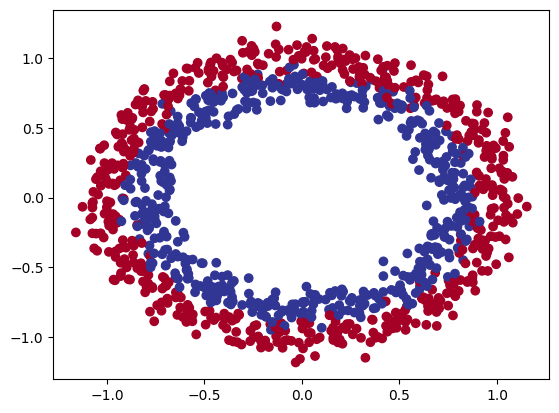

In [7]:
plt.scatter(X[:, 0], X[:, 1],c=y, cmap = plt.cm.RdYlBu)

In [8]:
circles_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(15, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

circles_model.compile(loss='binary_crossentropy',
                      optimizer=tf.keras.optimizers.Adam(),
                      metrics=["accuracy"])

circles_model.fit(X, y, epochs=100)

Epoch 1/100
35/35 [==============================] - 1s 4ms/step - loss: 0.6929 - accuracy: 0.5005
Epoch 2/100
35/35 [==============================] - 0s 3ms/step - loss: 0.6911 - accuracy: 0.4950
Epoch 3/100
35/35 [==============================] - 0s 4ms/step - loss: 0.6899 - accuracy: 0.5041
Epoch 4/100
35/35 [==============================] - 0s 3ms/step - loss: 0.6886 - accuracy: 0.5131
Epoch 5/100
35/35 [==============================] - 0s 3ms/step - loss: 0.6873 - accuracy: 0.5122
Epoch 6/100
35/35 [==============================] - 0s 4ms/step - loss: 0.6859 - accuracy: 0.5149
Epoch 7/100
35/35 [==============================] - 0s 4ms/step - loss: 0.6842 - accuracy: 0.5437
Epoch 8/100
35/35 [==============================] - 0s 3ms/step - loss: 0.6821 - accuracy: 0.5500
Epoch 9/100
35/35 [==============================] - 0s 3ms/step - loss: 0.6799 - accuracy: 0.5698
Epoch 10/100
35/35 [==============================] - 0s 3ms/step - loss: 0.6769 - accuracy: 0.5689
Epoch 11/

In [9]:
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap='viridis', alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


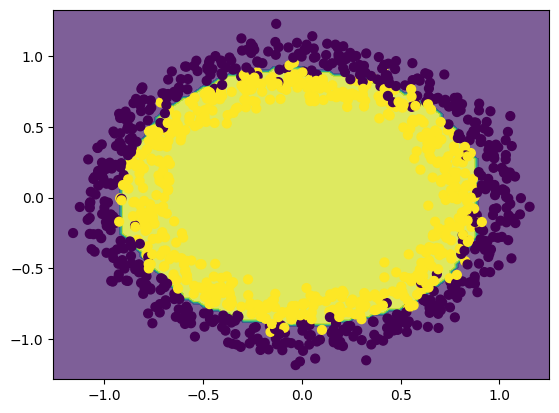

In [10]:
plot_decision_boundary(circles_model, X, y)

In [12]:
model_new = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_new.compile(loss = "binary_crossentropy", optimizer="adam", metrics=['accuracy'])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda  epoch: 1e-4 * 10 ** (epoch / 20))
history = model_new.fit(X, y, callbacks = [lr_scheduler], epochs = 100 )

Epoch 1/100
35/35 [==============================] - 0s 4ms/step - loss: 0.6939 - accuracy: 0.5032 - lr: 1.0000e-04
Epoch 2/100
35/35 [==============================] - 0s 4ms/step - loss: 0.6935 - accuracy: 0.5041 - lr: 1.1220e-04
Epoch 3/100
35/35 [==============================] - 0s 4ms/step - loss: 0.6930 - accuracy: 0.5059 - lr: 1.2589e-04
Epoch 4/100
35/35 [==============================] - 0s 4ms/step - loss: 0.6926 - accuracy: 0.5041 - lr: 1.4125e-04
Epoch 5/100
35/35 [==============================] - 0s 4ms/step - loss: 0.6921 - accuracy: 0.5059 - lr: 1.5849e-04
Epoch 6/100
35/35 [==============================] - 0s 4ms/step - loss: 0.6916 - accuracy: 0.5032 - lr: 1.7783e-04
Epoch 7/100
35/35 [==============================] - 0s 5ms/step - loss: 0.6911 - accuracy: 0.5032 - lr: 1.9953e-04
Epoch 8/100
35/35 [==============================] - 0s 6ms/step - loss: 0.6906 - accuracy: 0.5032 - lr: 2.2387e-04
Epoch 9/100
35/35 [==============================] - 0s 4ms/step - loss:

In [20]:
model_new1 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_new1.compile(loss = "binary_crossentropy", optimizer=tf.keras.optimizers.Adam(learning_rate=0.009), metrics=['accuracy'])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda  epoch: 1e-4 * 10 ** (epoch / 20))
model_new1.fit(X, y, epochs = 100 )

Epoch 1/100
35/35 [==============================] - 0s 6ms/step - loss: 0.6896 - accuracy: 0.5113
Epoch 2/100
35/35 [==============================] - 0s 6ms/step - loss: 0.6844 - accuracy: 0.5563
Epoch 3/100
35/35 [==============================] - 0s 5ms/step - loss: 0.6795 - accuracy: 0.5473
Epoch 4/100
35/35 [==============================] - 0s 5ms/step - loss: 0.6716 - accuracy: 0.5698
Epoch 5/100
35/35 [==============================] - 0s 5ms/step - loss: 0.6622 - accuracy: 0.6130
Epoch 6/100
35/35 [==============================] - 0s 5ms/step - loss: 0.6440 - accuracy: 0.6625
Epoch 7/100
35/35 [==============================] - 0s 5ms/step - loss: 0.6133 - accuracy: 0.6940
Epoch 8/100
35/35 [==============================] - 0s 6ms/step - loss: 0.5743 - accuracy: 0.7381
Epoch 9/100
35/35 [==============================] - 0s 5ms/step - loss: 0.5435 - accuracy: 0.7534
Epoch 10/100
35/35 [==============================] - 0s 5ms/step - loss: 0.5204 - accuracy: 0.7633
Epoch 11/

<Axes: >

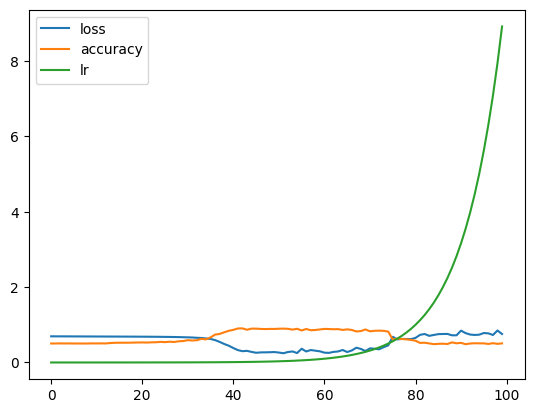

In [14]:
pd.DataFrame(history.history).plot()

In [17]:
lrs = 1e-4 * (10 ** (tf.range(100)/20))
lrs

<tf.Tensor: shape=(100,), dtype=float64, numpy=
array([1.00000000e-04, 1.12201845e-04, 1.25892541e-04, 1.41253754e-04,
       1.58489319e-04, 1.77827941e-04, 1.99526231e-04, 2.23872114e-04,
       2.51188643e-04, 2.81838293e-04, 3.16227766e-04, 3.54813389e-04,
       3.98107171e-04, 4.46683592e-04, 5.01187234e-04, 5.62341325e-04,
       6.30957344e-04, 7.07945784e-04, 7.94328235e-04, 8.91250938e-04,
       1.00000000e-03, 1.12201845e-03, 1.25892541e-03, 1.41253754e-03,
       1.58489319e-03, 1.77827941e-03, 1.99526231e-03, 2.23872114e-03,
       2.51188643e-03, 2.81838293e-03, 3.16227766e-03, 3.54813389e-03,
       3.98107171e-03, 4.46683592e-03, 5.01187234e-03, 5.62341325e-03,
       6.30957344e-03, 7.07945784e-03, 7.94328235e-03, 8.91250938e-03,
       1.00000000e-02, 1.12201845e-02, 1.25892541e-02, 1.41253754e-02,
       1.58489319e-02, 1.77827941e-02, 1.99526231e-02, 2.23872114e-02,
       2.51188643e-02, 2.81838293e-02, 3.16227766e-02, 3.54813389e-02,
       3.98107171e-02, 4.4668

Text(0, 0.5, 'LOSS')

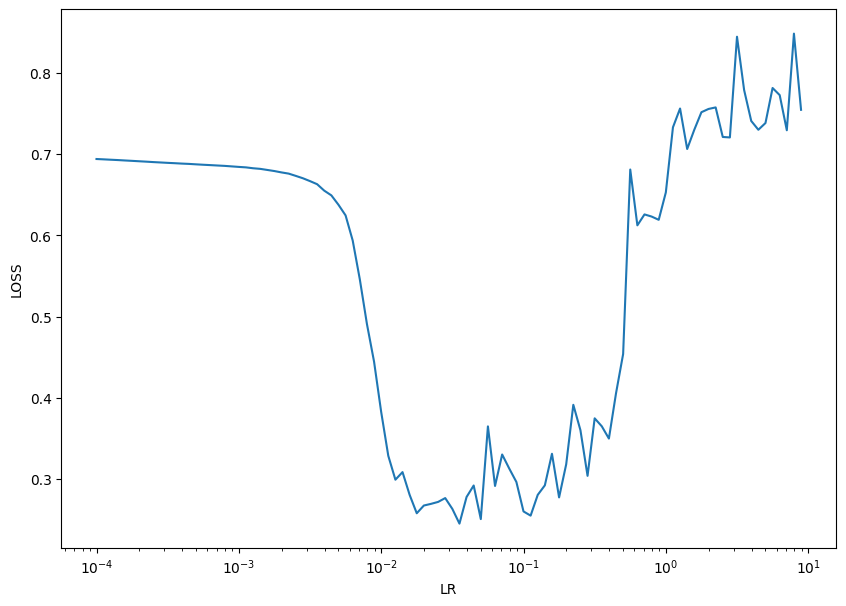

In [18]:
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history["loss"])
plt.xlabel("LR")
plt.ylabel("LOSS")